In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions
import time
import seaborn as sns
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
inputs, target = make_blobs(n_samples=1000,random_state=365,centers=[(-3,3),(0,0),(2,2)])

In [ ]:
inputs.shape
target.shape

(1000,)

In [ ]:
df = pd.DataFrame(data=inputs,columns=['F1','F2'])
df['Target'] = target
df.head()


,F1,F2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0


<Axes: xlabel='F1', ylabel='F2'>

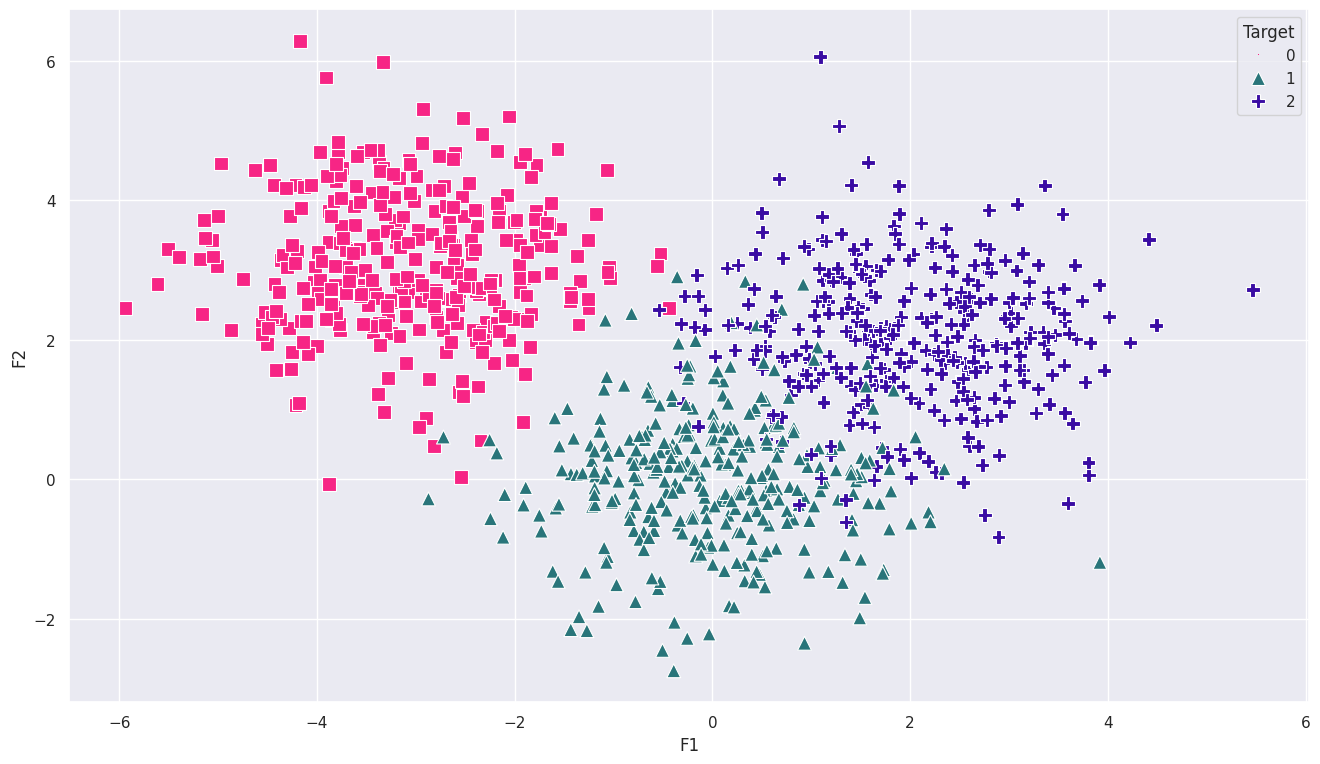

In [ ]:
sns.set()
plt.figure(figsize=(16,9))
knn_pal = sns.color_palette=(['#F72585','#29757A','#3A0CA3'])
sns.scatterplot(x='F1', y='F2',data=df,
                hue='Target',
                palette=knn_pal,
                markers=[',','^','P'],
                style='Target',
                s=100
                )

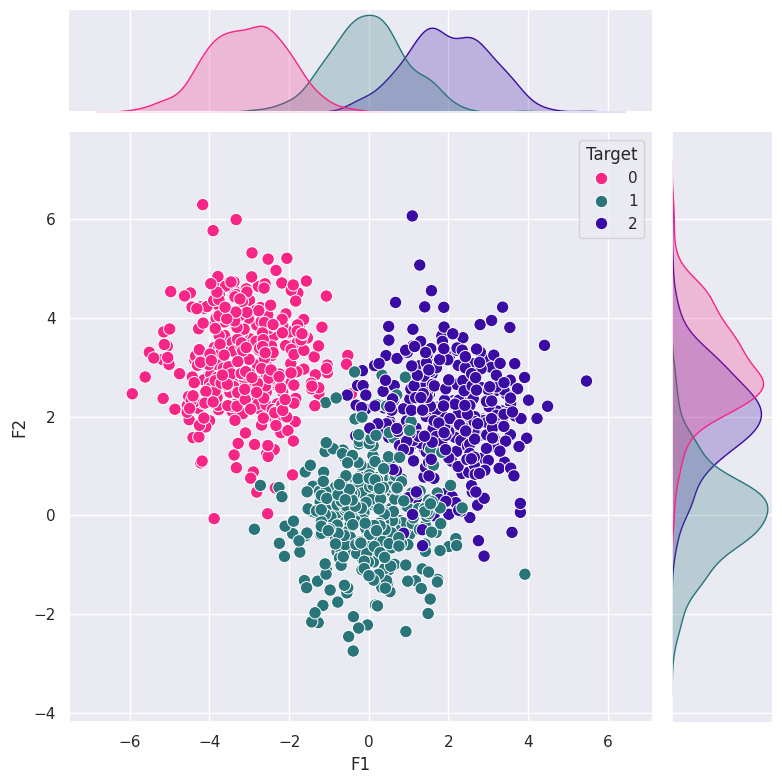

In [ ]:
sns.jointplot(x='F1', y='F2',data=df,
                hue='Target',
                palette=knn_pal,
                markers=[',','^','P'],
                height=8,
                s=80,
              legend=True
              )

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2,random_state=365, stratify=target)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)

In [ ]:
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
x_cor = -0.18
y_cor = 3.2
clf.predict([[x_cor,y_cor]])

array([2])


Finding the index of the data point and the finding the nearest neighbour on the plot



In [ ]:
neighbour = clf.kneighbors([[x_cor,y_cor]])
neighbour

(array([[0.27086818]]), array([[336]]))

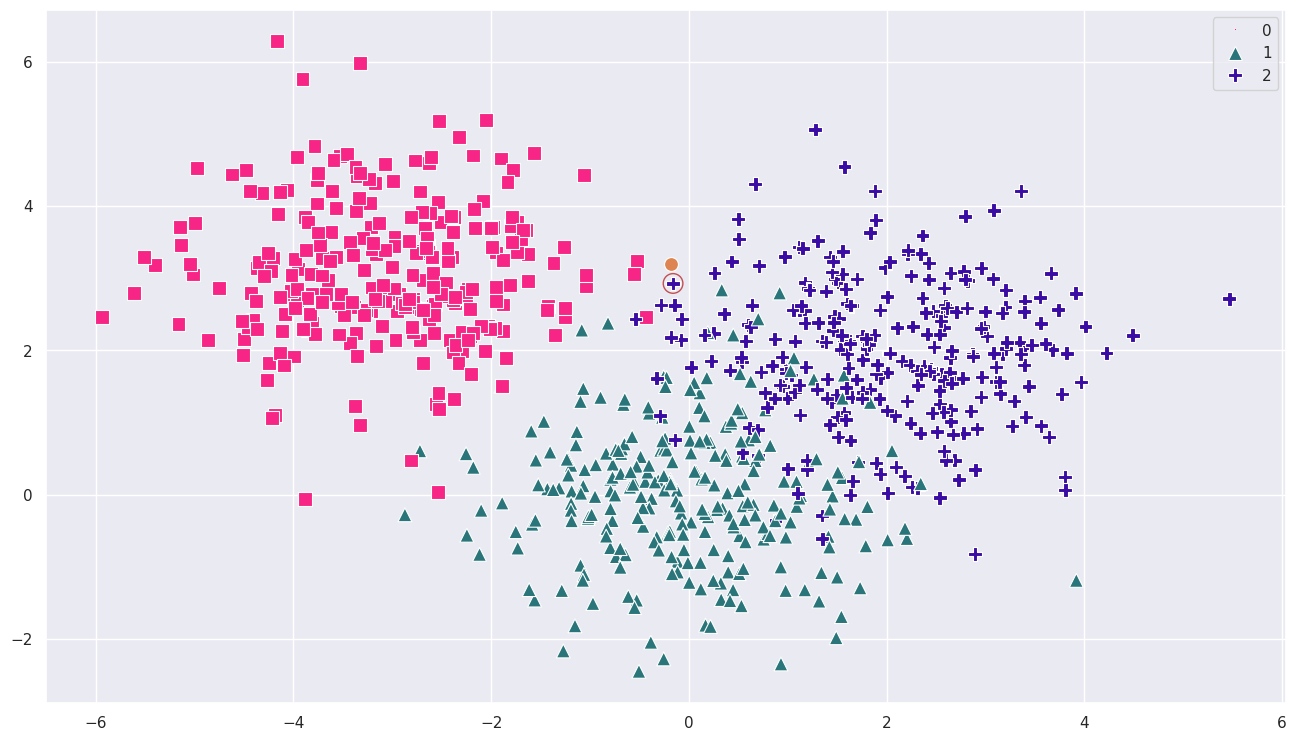

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=x_train[:,0],
                y=x_train[:,1],

                hue=y_train,
                palette=knn_pal,
                markers=[',','^','P'],
                style=y_train,
                s=100,
                legend=True
                )

sns.scatterplot(x=[x_cor],
                y=[y_cor],
                style=[y_cor],
                markers=['o'],
                s=100,
                legend=False
                )

plot_x_train = []
plot_y_train = []

for i in neighbour[1]:
  plot_x_train.append(x_train[i,0])
  plot_y_train.append(x_train[i,1])


# plot_x_train
# plot_y_train

plt.scatter(plot_x_train,
            plot_y_train,
            s=200,
            facecolors='none',
            edgecolors='r')

Time elapsed : 77.1 seconds


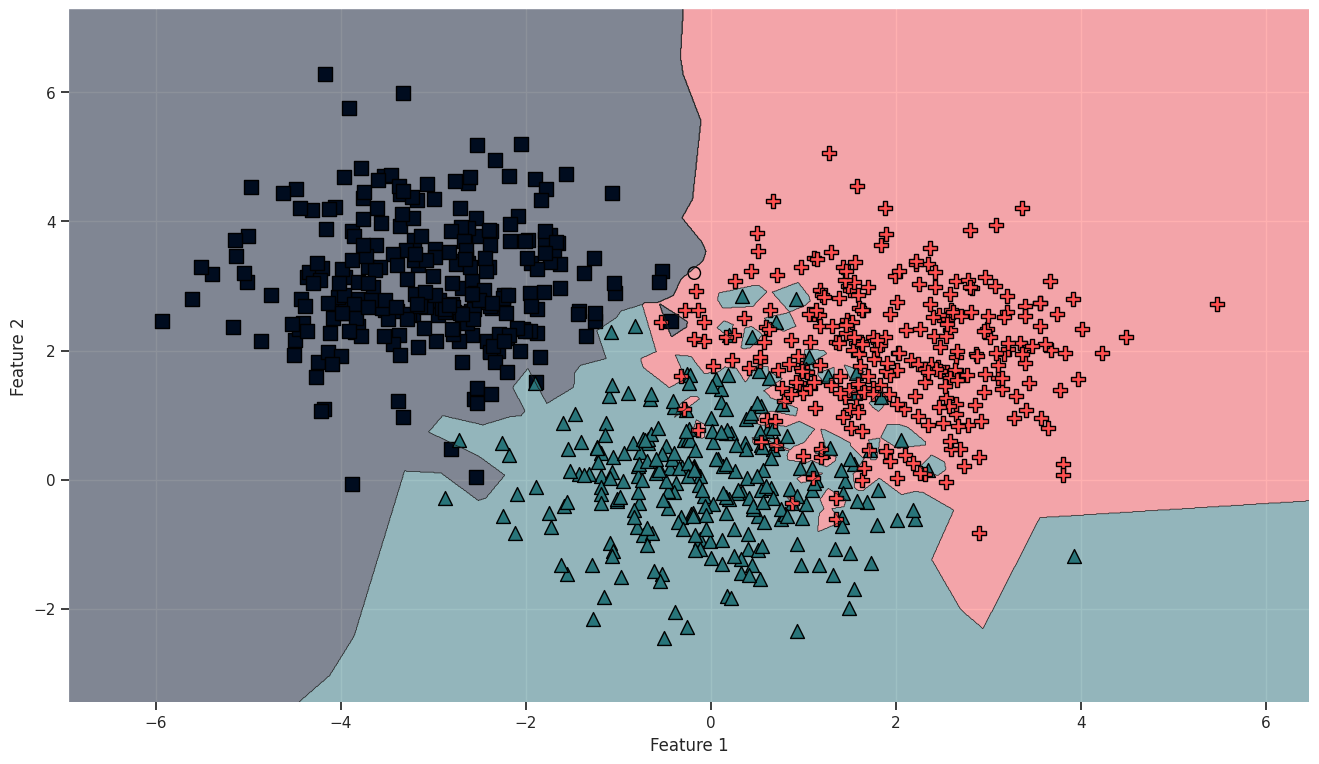

In [ ]:
start = time.time()

plt.figure(figsize=(16,9))

plot_decision_regions(
    X = x_train,
    y = y_train,
    X_highlight= np.array([[x_cor,y_cor]]),
    clf = clf,
    colors = '#000c1f,#29757a,#ff5050',
    markers=[',','^','P'],
    scatter_kwargs= { 's': 100 , 'edgecolors' : 'white' , 'alpha' : 1 } ,
    legend = 0
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

end = time.time()
print(f'Time elapsed : {round(end - start, 1)} seconds')

**####################### Picking the best K value ##############**

In [ ]:
error_uniform = []
error_distance = []
for k in range(1,51):
  clf = KNeighborsClassifier(n_neighbors=k, weights='uniform')
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  error_uniform.append(1-accuracy_score(y_test,y_pred))

  clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  error_distance.append(1-accuracy_score(y_test,y_pred))  #miscalculation = 1-accuracy_score





In [ ]:
error_uniform
error_distance

[0.09499999999999997,
 0.09499999999999997,
 0.06999999999999995,
 0.06499999999999995,
 0.06499999999999995,
 0.06000000000000005,
 0.06000000000000005,
 0.06000000000000005,
 0.050000000000000044,
 0.06499999999999995,
 0.05500000000000005,
 0.06000000000000005,
 0.05500000000000005,
 0.05500000000000005,
 0.05500000000000005,
 0.05500000000000005,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.050000000000000044,
 0.04500000000000004,
 0.04500000000000004,
 0.040000000000000036,
 0.040000000000000036,
 0.040000000000000036,
 0.03500000000000003,
 0.03500000000000003,
 0.03500000000000003,
 0.03500000000000003,
 0.03500000000000003,
 0.03500000000000003,
 0.03500000000000003,
 0.03500000000000003,
 0.040000000000000036,
 0.03500000000000003,
 0.03500000000000003,
 0.03500000000000003,
 0.040000000000000036,
 0.03500000000000003,
 0.03500000000000

Text(0, 0.5, 'Error rate')

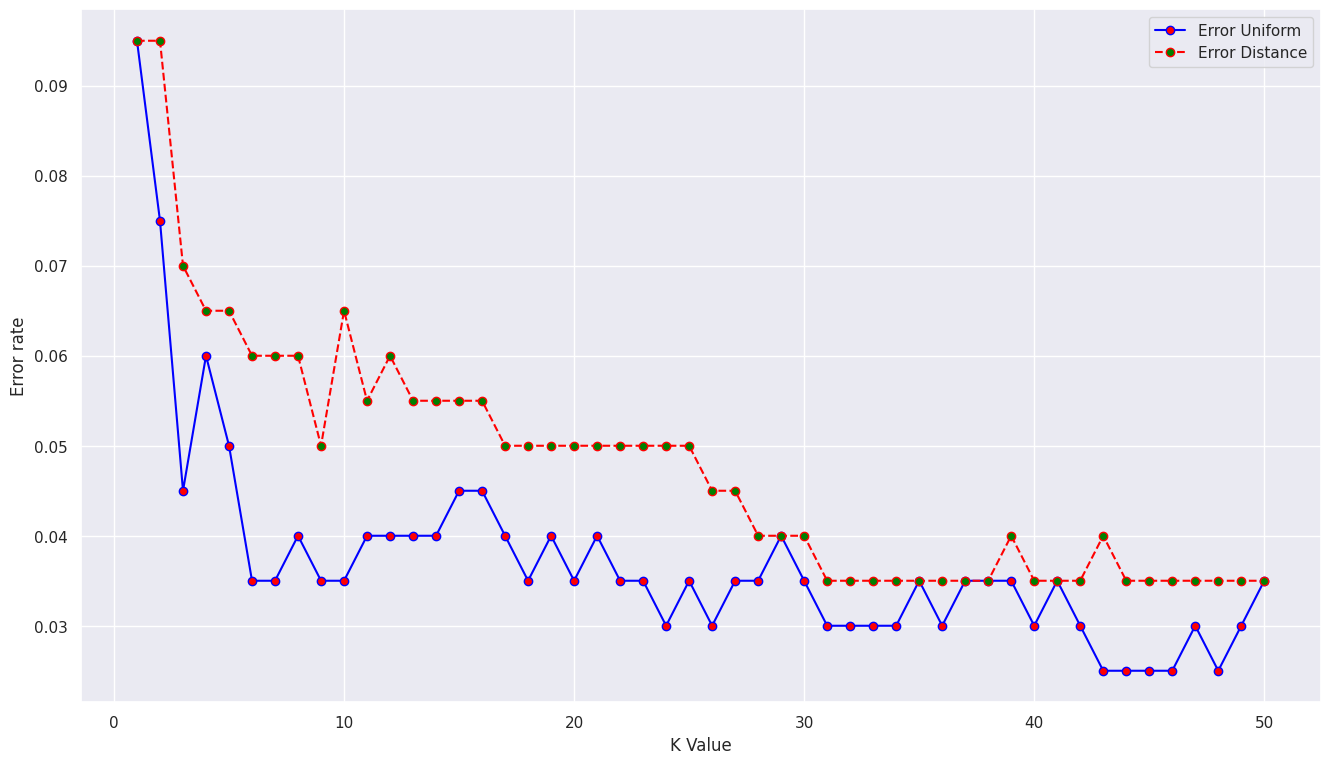

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(range(1,51), error_uniform,c='blue',linestyle='solid',marker='o', markerfacecolor='red',label='Error Uniform')
plt.plot(range(1,51), error_distance,c='red',linestyle='dashed',marker='o', markerfacecolor='green',label='Error Distance')
plt.legend()
plt.xlabel('K Value')
plt.ylabel('Error rate')


In [ ]:
param = {
    'n_neighbors' : range(1,51),
    'weights' : ['uniform','distance']
}
param

{'n_neighbors': range(1, 51), 'weights': ['uniform', 'distance']}

In [ ]:
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param, scoring='accuracy')

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [ ]:
clf = grid.best_estimator_

In [ ]:
clf.predict([[x_cor,y_cor]])
y_new_pred = clf.predict(x_test)
y_new_pred.shape

(200,)

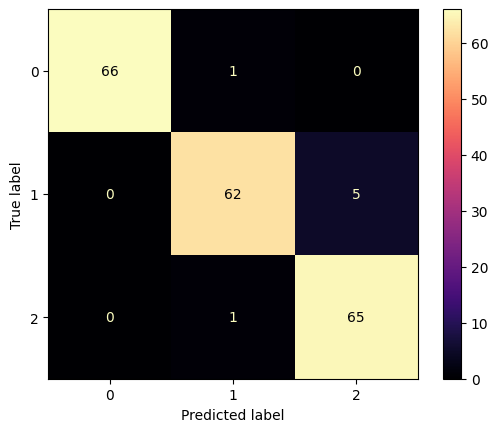

In [ ]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test,y_new_pred,cmap='magma')

In [ ]:
print(classification_report(y_test,y_new_pred,target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      0.93      0.95        67
           2       0.93      0.98      0.96        66

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200





**################# KNN in Regression Tasks ################**



In [ ]:
from sklearn.datasets import make_regression

In [ ]:
inputs, target = make_regression(n_samples=10,
                                 n_features=1,
                                 noise=15,
                                 random_state=365)

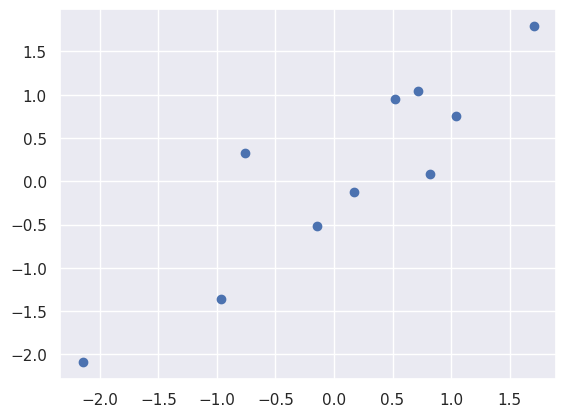

In [ ]:
sns.set()
target = target/40
plt.scatter(inputs,target)

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=2)
knn_reg.fit(inputs,target)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
x_pred = -0.5
y_pred = knn_reg.predict([[x_pred]])
y_pred

array([-0.09226329])

In [ ]:
neg = knn_reg.kneighbors([[x_pred]])
neg

(array([[0.26014535, 0.35632097]]), array([[8, 3]]))

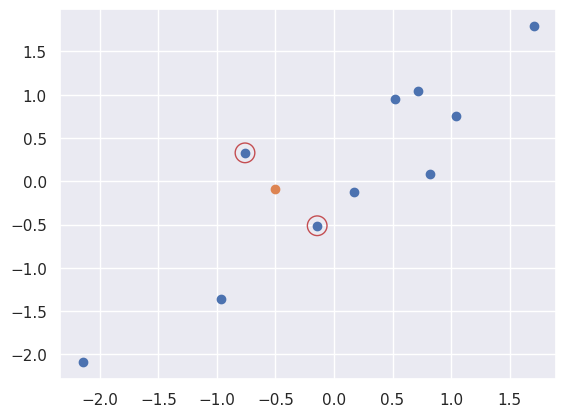

In [ ]:
sns.set()

plt.scatter(inputs,target)
plt.scatter(x_pred,y_pred)
plt_x = []
plt_y = []

for i in neg[1]:
  plt_x.append(inputs[i])
  plt_y.append(target[i])


plt.scatter(
    plt_x,
    plt_y,
    s=200,
    edgecolors='r',
    facecolors='none'
)
